In [1]:
#imports
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px


import warnings
warnings.filterwarnings("ignore")

## Movie gross

In [2]:
movie_gross = pd.read_csv("../data/bom.movie_gross.csv")
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
movie_gross.shape

(3387, 5)

In [4]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [6]:
movie_gross_clean = movie_gross.dropna()
movie_gross_clean.shape

(2007, 5)

In [7]:
movie_gross_clean.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [8]:
len(movie_gross_clean['studio'].unique())

172

In [9]:
movie_gross_clean.duplicated().sum()

0

## Movie info

In [10]:
movie_info = pd.read_csv("../data/rt.movie_info.tsv", sep="\t")
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [11]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [12]:
movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [13]:
movies_information = movie_info.drop(['theater_date', 'dvd_date', 'currency', 'box_office', 'studio'], axis=1)
movies_information.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'runtime'], dtype='object')

In [14]:
movies_information.isna().sum()

id            0
synopsis     62
rating        3
genre         8
director    199
writer      449
runtime      30
dtype: int64

In [15]:
movies_information = movies_information.dropna()
movies_information.shape

(1021, 7)

In [16]:
movies_information.head(3)

,id,synopsis,rating,genre,director,writer,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,108 minutes
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,116 minutes


In [17]:
movies_information.duplicated().sum()

0

In [69]:
movies_information['genre'] = movies_information['genre'].str.replace(' and ', '|')
movies_information['genre'] = movies_information['genre'].str.split('|')
movies_information = movies_information.explode('genre').reset_index(drop=True)
print(movies_information.shape)
print(movies_information.head(3))

(3201, 7)
   id                                           synopsis rating      genre  \
0   1  This gritty, fast-paced, and innovative police...      R     Action   
1   1  This gritty, fast-paced, and innovative police...      R  Adventure   
2   1  This gritty, fast-paced, and innovative police...      R   Classics   

           director          writer      runtime  
0  William Friedkin  Ernest Tidyman  104 minutes  
1  William Friedkin  Ernest Tidyman  104 minutes  
2  William Friedkin  Ernest Tidyman  104 minutes  


## Reviews

In [19]:
reviews = pd.read_csv("../data/rt.reviews.tsv", sep="\t", encoding="latin1")
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [20]:
reviews.shape

(54432, 8)

In [21]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [22]:
reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [23]:
reviews = reviews.dropna()
reviews.shape

(33988, 8)

In [24]:
reviews.duplicated().sum()

0

## Movies

In [25]:
movies = pd.read_csv("../data/tmdb.movies.csv", index_col=0)
movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [26]:
movies.shape

(26517, 9)

In [27]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [28]:
movies.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [29]:
movies.duplicated().sum()

1020

In [30]:
movies = movies.drop_duplicates()
movies.shape

(25497, 9)

## Movie budgets

In [31]:
movie_budgets = pd.read_csv("../data/tn.movie_budgets.csv")
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [32]:
movie_budgets.shape

(5782, 6)

In [33]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [34]:
movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [35]:
movie_budgets.duplicated().sum()

0

In [36]:
movie_budgets.rename(columns={'movie': 'title'}, inplace=True)
movie_budgets.columns

Index(['id', 'release_date', 'title', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

## Merging the datasets

In [37]:
df_movies = movie_gross_clean.merge(movies, on='title', how='inner')
df_movies.shape

(1576, 13)

In [38]:
df_movies.isna().sum()

title                0
studio               0
domestic_gross       0
foreign_gross        0
year                 0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
vote_average         0
vote_count           0
dtype: int64

In [39]:
df_movies.head()

,title,studio,domestic_gross,foreign_gross,year,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
0,Toy Story 3,BV,415000000.0,652000000,2010,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,7.7,8340
1,Inception,WB,292600000.0,535700000,2010,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,6.1,3843
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909
4,Iron Man 2,Par.,312400000.0,311500000,2010,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368


In [40]:
df_movies = df_movies.merge(movie_budgets, on="title", how='inner')
df_movies.shape

(1094, 18)

In [41]:
df_movies.head(3)

,title,studio,domestic_gross_x,foreign_gross,year,genre_ids,id_x,original_language,original_title,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,7.7,8340,47,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,6.1,3843,27,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673"


In [42]:
# drop columns
cols_to_drop = ['id_x', 'original_language', 'id_y', 'release_date_y', 'domestic_gross_y']
df_movies.drop(columns=cols_to_drop, axis=1, inplace=True)
df_movies.columns

Index(['title', 'studio', 'domestic_gross_x', 'foreign_gross', 'year',
       'genre_ids', 'original_title', 'popularity', 'release_date_x',
       'vote_average', 'vote_count', 'production_budget', 'worldwide_gross'],
      dtype='object')

In [44]:
df_movies['production_budget'] = df_movies['production_budget'].str.strip('$').str.replace(',', '').astype(int)
df_movies['worldwide_gross'] = df_movies['worldwide_gross'].str.strip('$').str.replace(',', '').astype(int)
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1093
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1094 non-null   object 
 1   studio             1094 non-null   object 
 2   domestic_gross_x   1094 non-null   float64
 3   foreign_gross      1094 non-null   object 
 4   year               1094 non-null   int64  
 5   genre_ids          1094 non-null   object 
 6   original_title     1094 non-null   object 
 7   popularity         1094 non-null   float64
 8   release_date_x     1094 non-null   object 
 9   vote_average       1094 non-null   float64
 10  vote_count         1094 non-null   int64  
 11  production_budget  1094 non-null   int32  
 12  worldwide_gross    1094 non-null   int32  
dtypes: float64(3), int32(2), int64(2), object(6)
memory usage: 111.1+ KB


In [68]:
# create profit column 
df_movies['profit'] = df_movies['worldwide_gross'] - df_movies['production_budget']
df_movies.head(2)

,title,studio,domestic_gross_x,foreign_gross,year,genre_ids,original_title,popularity,release_date_x,vote_average,vote_count,production_budget,worldwide_gross,profit
0,Toy Story 3,BV,415000000.0,652000000,2010,"[16, 10751, 35]",Toy Story 3,24.445,2010-06-17,7.7,8340,200000000,1068879522,868879522
1,Inception,WB,292600000.0,535700000,2010,"[28, 878, 12]",Inception,27.920,2010-07-16,8.3,22186,160000000,835524642,675524642


In [70]:
# trial for movies info
# merge movie info with reviews

info_reviews = movies_information.merge(reviews, on='id', how='inner')
info_reviews.shape

(78698, 14)

## Distributions

In [49]:
# check for distributions
fig = px.histogram(df_movies, x="production_budget", nbins=8)
fig.show()

In [63]:
fig = px.histogram(df_movies, x="worldwide_gross", nbins=10,
                   labels={'worldwide_gross':'worldwide gross'})
fig.show()

In [59]:
fig = px.histogram(df_movies, x="popularity", nbins=7)
fig.show()

In [64]:
# box plots
fig = px.box(df_movies, y="production_budget")
fig.show()

In [65]:
# decide on how many box plots to display

Text(0.5, 1.0, 'KDE Plot of production budgets')

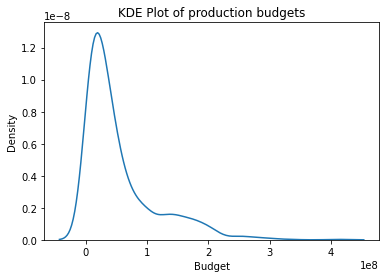

In [66]:
# kde plot
sns.kdeplot(df_movies['production_budget'])
plt.xlabel('Budget')
plt.ylabel('Density')
plt.title('KDE Plot of production budgets')

In [67]:
# plot required kde plots and interpret them